Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

---

Please **submit this Jupyter notebook through Canvas** no later than **Monday November 23 12:59**, before the start of the lecture.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

MeifangLi_13043390
YuhaoQian_13011456

In [1]:
# Evaluate this cell to import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import math

# Sparse matrices
A _sparse matrix_ or _sparse array_ is a matrix in which most of the elements are zero. There is no strict definition how many elements need to be zero for a matrix to be considered sparse but a common criterion is that the number of non-zero elements is roughly the number of rows or columns. By contrast, if most of the elements are nonzero, then the matrix is considered _dense_. 

In the context of software for scientific computing, a sparse matrix typically refers to a storage format, in which elements which are known to be zero are not stored. In Python, the library `scipy.sparse` defines several sparse matrix classes, such as `scipy.sparse.coo_matrix`. To construct such an object, one passes for each nonzero element the value, and the row and column coordinates. In some cases, one can also just pass the nonzero (off-)diagonals, see `scipy.sparse.diags`.

Functions for dense matrices do not always work with sparse matrices. For example for the product of a sparse matrix with a (dense) vector, there is the member function `scipy.sparse.coo_matrix.dot`, and for solving linear equations involving a sparse matrix, there is the function `scipy.sparse.linalg.spsolve`.

In [2]:
from scipy.sparse import coo_matrix

# This is how to create a sparse matrix from a given list of (row, column, value) tuples.
row  = [0,   3,   1,   0]
col  = [0,   3,   1,   2]
data = [4.0, 5.0, 7.0, 9.0]
M = coo_matrix((data, (row, col)), shape=(4, 4))

print("When printing a sparse matrix, it shows its nonzero entries:")
print(M)

print("If you want to see its `dense` matrix form, you have to use `mat.toarray()`:")
print(M.toarray())

# This is how to perform matrix-vector products.
x = np.array([1, 2, 3, 4])
print("For x={}, Mx = {}".format(x, M.dot(x)))

When printing a sparse matrix, it shows its nonzero entries:
  (0, 0)	4.0
  (3, 3)	5.0
  (1, 1)	7.0
  (0, 2)	9.0
If you want to see its `dense` matrix form, you have to use `mat.toarray()`:
[[4. 0. 9. 0.]
 [0. 7. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 5.]]
For x=[1 2 3 4], Mx = [31. 14.  0. 20.]


This matrix has values on its diagonal and on offdiagonals 1 and 2 rows ABOVE it.
[[1. 1. 1. 0.]
 [0. 2. 2. 2.]
 [0. 0. 3. 3.]
 [0. 0. 0. 4.]]
This matrix has values on its diagonal and on offdiagonals 1 and 2 rows BELOW it.
[[1. 0. 0. 0.]
 [1. 2. 0. 0.]
 [1. 2. 3. 0.]
 [0. 2. 3. 4.]]
If you want to visualize the matrix for yourself, use `plt.imshow`:


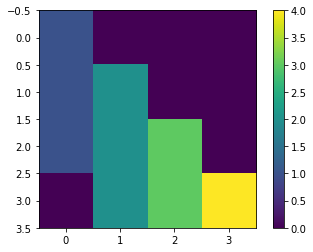

For b=[1 2 3 4], the solution x to Mx=b is [1.         0.5        0.33333333 0.5       ]
And indeed, Mx - b = [0. 0. 0. 0.]


In [3]:
from scipy.sparse import diags, SparseEfficiencyWarning
from scipy.sparse.linalg import spsolve
import warnings
warnings.simplefilter('ignore', SparseEfficiencyWarning)  # Suppress confusing warning

# This is how to create a sparse matrix from a given list of subdiagonals.
diagonals = [[1, 2, 3, 4], [1, 2, 3], [1, 2]]
M = diags(diagonals, [0, 1, 2])
print("This matrix has values on its diagonal and on offdiagonals 1 and 2 rows ABOVE it.")
print(M.toarray())

M = diags(diagonals, [0, -1, -2])
print("This matrix has values on its diagonal and on offdiagonals 1 and 2 rows BELOW it.")
print(M.toarray())

print("If you want to visualize the matrix for yourself, use `plt.imshow`:")
plt.imshow(M.toarray())
plt.colorbar()
plt.show()

# This is how to solve sparse systems.
b = np.array([1, 2, 3, 4])
x = spsolve(M, b)
print("For b={}, the solution x to Mx=b is {}".format(b, x))
print("And indeed, Mx - b = {}".format(M.dot(x) - b))

--------
# Exercise 1
Consider the following boundary value problem involving a nonlinear ordinary differential equation:

$$ \tag{1} y''(x) + \exp(y(x)) = 0, \quad 0 < x < 1, \quad y(0) = y(1) = 0.$$

The purpose of this exercise is to approximate the solution to this boundary value problem, by discretizing the problem and then solving the resulting system of nonlinear equations. 

Problem (1) will be discretized using finite differences. Suppose we use $n+2$ discretization points for $x$, denoted $x_k = kh$ for $k \in \{0, \ldots, n+1\}$ and $h = 1/(n+1)$. The approximate solution is denoted $y_k = y(x_k)$. 

We will use a _second-order central finite difference_ approximation for the second derivative: 

$$ \tag{2} y''(x_k) \approx \frac{y_{k-1} - 2 y_k + y_{k+1}}{h^2}.$$

The term $\exp(y(x_k))$ can simply be approximated by $\exp(y_k)$. Thus for $x=x_k$, equation (1) becomes

$$ \tag{3} \frac{y_{k-1} - 2 y_k + y_{k+1}}{h^2} + \exp y_k = 0, \quad k = 1, \ldots, n.$$

The boundary conditions (the conditions $y(0) = y(1) = 1$), lead to the requirement that $y_0 = y_{n+1} = 0$. To find the remaining values $y_k$, $k=1, \ldots, n$, equation (3) will be used for $k = 1, \ldots, n$. In this way, one obtains $n$ equations for $n$ unknowns, to which, in principle, a rootfinding method can be applied.

We will write $\vec y = \begin{bmatrix} y_1 \\ \vdots \\ y_n \end{bmatrix}$ for the vector of values to be determined. 


## (a) -- 2 points
As a first step, finish the function `SecondDerMatrix` that returns a matrix $\bf{M}$ that maps the vector $\vec y$ to the vector of the approximate values $y''(x_k)$, $k=1, \ldots, n$ given in (2). To get full points for this part of the exercise you must create output in the form of a sparse matrix.

In [4]:
from scipy.sparse import coo_matrix
from numpy import linalg as la

def SecondDerMatrix(n):
    # YOUR CODE HERE
    h=1/(n+1)
    diagonal=[[1/h**2]*(n-1),[-2/h**2]*n,[1/h**2]*(n-1)]
    M=diags(diagonal,[-1,0,1])
    return M.toarray()

## (b) -- 1 point
Second-order central finite differences are exact for quadratic functions. In order to test your implementation, choose $n=10$ and apply the second derivative matrix from part (a) to a quadratic function $y(x)$ with $y(0) = y(1) = 0$ for which you know the second derivative $y''(x)$.

In [5]:
# YOUR CODE HERE
# x_k=k/n+1
X=np.arange(1,11,1) # [1,2,3,...10] shape (1,10)
qua=[(x/11)**2-x/11 for x in X] # y=(x/n+1)^2-(x/n+1)  y''=2
y_sec_der=np.dot(SecondDerMatrix(10),qua)
print(y_sec_der)

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


## (c) -- 2 points


Defining $\vec y = \begin{bmatrix} y_1 \\ \vdots \\ y_n \end{bmatrix}$ and 
$E(\vec y) = \begin{bmatrix} \exp(y_1) \\ \vdots \\ \exp(y_n) \end{bmatrix}$, the equations (3) can be written in the form

$$ F(\vec y) := {\bf M} \cdot \vec y + E(\vec y) = \vec 0. $$

Finish the function `F` that defines $F(\vec y) = {\bf M} \cdot \vec y + E(\vec y)$.
Finish the function `JacobianF` that computes the Jacobian ${\bf J}_F(\vec y)$ of $F(\vec y)$.
To get full points for this part of the exercise, the Jacobian must be computed in the form of a sparse matrix.

In [6]:
def F(y):
    # YOUR CODE HERE
    return SecondDerMatrix(len(y)).dot(y)+np.exp(y)
    
def JacobianF(y):
    # YOUR CODE HERE
    
    ## We found that we can obatin Jacobian by adding e^(y_n) 
    ## to the diagonal of matrix M in (a)
    M=SecondDerMatrix(len(y))
    for i in range(len(y)):
        M[i,i]+=np.exp(y[i])
    return M

## (d) -- 3 points
1. Write down the first order Taylor expansion $T_F(\vec y, \vec s)$ for $F(\vec y+\vec s)$.
2. In order to check your implementation of the Jacobian matrix, compute and print both $F(\vec y+\vec s)$ and its first order Taylor approximation $T_F(\vec y, \vec s)$ for a choice $\vec y$ and $\vec s$.
3. Verify numerically that the error $||F(\vec y + \vec s) - T_F(\vec y, \vec s)||_2$ is $\mathcal O(||\vec s||_2^2)$. Hint: take vectors $\vec s$ with $\|\vec s\|_2 = \mathcal O(h)$  for multiple values for $h$, e.g. $h = 10^{-k}$ for a range of $k$. 

Subquestion 1.

$T_F(\vec y,\vec s)$=$F(\vec y)$+$F'(\vec y)\cdot \vec s$ =$F(\vec y)$+($\partial F_i(\pmb y)/\partial y_j$) $\cdot \vec s$=$F(\vec y)$+$\pmb J_F(\pmb y) \cdot \vec s$

F(y+s) [ -2.53793606  -0.1370516    3.20800782 -56.42384794]
T_F(y,s) [ -2.53793729  -0.13706151   3.20800374 -56.42386997]
s: [0.1, 0.1, 0.1, 0.1]
s: [0.01, 0.01, 0.01, 0.01]
s: [0.001, 0.001, 0.001, 0.001]
s: [0.0001, 0.0001, 0.0001, 0.0001]
s: [1e-05, 1e-05, 1e-05, 1e-05]
s: [1e-06, 1e-06, 1e-06, 1e-06]
s: [1e-07, 1e-07, 1e-07, 1e-07]
s: [1e-08, 1e-08, 1e-08, 1e-08]
s: [1e-09, 1e-09, 1e-09, 1e-09]


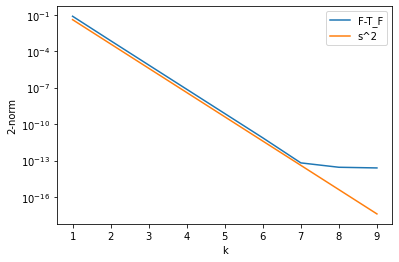

In [7]:
# Subquestions 2 and 3.
# YOUR CODE HERE
def taylor(y,s):
    return F(y)+np.dot(JacobianF(y),s)

x=[0.1,0.2,0.3,0.4]
y=[10*(i-i**2) for i in x ]
s=[0.001,0.002,-0.001,-0.002]
t=[y[i]+s[i] for i in range(len(y))]
Fys=F(t)
TFys=taylor(y,s)
print('F(y+s)',Fys)
print('T_F(y,s)',TFys)


error=[] #F-T_F 2-norm
bigO=[] # s 2-norm square
step=range(1,10)
for k in step:
    ss = [1 / 10 ** k] * 4
    print('s:',ss)
    t = [y[i] + ss[i] for i in range(len(y))]
    Fys = F(t)
    TFys = taylor(y, ss)
    error.append(la.norm(Fys-TFys,2))
    bigO.append(la.norm(ss,2)**2)
plt.semilogy(step,error,label='F-T_F')
plt.semilogy(step,bigO,label='s^2')
plt.ylabel('2-norm')
plt.xlabel('k')
plt.legend()
plt.show()

When k<=7, $||F(\vec y + \vec s) - T_F(\vec y, \vec s)||_2$ and $\mathcal O(||\vec s||_2^2)$ have same trend. But the error will not decrease due to machine pricision when k>7.

## (e) -- 2 points
1. Finish the function `NewtonSolve` below to solve the system of equations.
2. Take $n=40$, and experiment with your function. Try to find a choice of `y0` such that the method doesn't converge, as well as a choice of `y0` such that the method converges. In your answer, list the types of convergence behavior you found. Show a convergent example (if you found any) and a nonconvergent example (if you found any). Show the solutions you found for each example.


In [8]:
# Subquestion 1.
def NewtonSolve(y0, K):
    """ Use Newton's method to solve F(y) = 0 with initial guess y0 and K iterations. """
    y = y0
    # YOUR CODE HERE
    for iteration in range(K):
        delta_y=spsolve(JacobianF(y),-F(y))
        for i in range(len(y)):
            y[i]+=delta_y[i]
        print('F(y) after',iteration+1,'iteration:',F(y))
    return y

In [10]:
# Subquestion 2, code part
# YOUR CODE HERE

#convergence case
print('convergence case')
y0_con=np.random.random(40) # length=40
result=NewtonSolve(y0_con,K=10)
print('Solution',result)

# non convergence case, in which y0 is far away from root
print('non convergence case')
y0_noncon=np.random.random(40)*10 #[100,100,100,...,100,100,100] length=40
result=NewtonSolve(y0_noncon,K=10)
print('Solution',result)

convergence case
F(y) after 1 iteration: [1.97186273e-01 8.15422847e-01 1.72178899e-02 6.46196480e-04
 1.08717599e-02 2.24941329e-02 3.69791247e-01 3.16451044e-01
 2.39916524e-01 1.80566190e-01 3.09969327e-01 7.80357113e-02
 2.56849139e-05 1.69838404e-05 4.02217868e-01 1.03401335e-02
 2.24814716e-06 6.11103283e-02 6.50975258e-04 3.21436483e-01
 7.74343654e-01 2.35342768e-01 2.27936351e-01 1.58841716e-01
 9.64185516e-02 3.79737016e-05 3.94767255e-01 1.15688673e-01
 8.47023679e-02 4.68391531e-01 4.11905613e-01 3.51584594e-01
 1.38849635e-01 2.98557088e-06 2.07165050e-01 4.27330576e-01
 3.58229148e-02 5.44275827e-01 7.54499166e-01 3.83175598e-02]
F(y) after 2 iteration: [3.52648074e-06 1.36245413e-05 2.67527546e-05 4.43075544e-05
 6.63925865e-05 9.29464988e-05 1.23811551e-04 1.55085254e-04
 1.86026825e-04 2.16525130e-04 2.46599497e-04 2.73773182e-04
 3.00753021e-04 3.28503342e-04 3.56907103e-04 3.78889694e-04
 4.00626397e-04 4.22189742e-04 4.42341026e-04 4.62056746e-04
 4.75035421e-04 4.7

Subquestion 2, text part

The Newton's method is dependent on the starting value $y_0$. The Newton's method might not converge if the initial guess is too far away from the real root. In the non convergence case above, after 10 iterations $F(y)$ is still far away from $\vec 0$ so the initial case is a nonconvergent example. In the convergence case above, after 3 iterations $F(y)$ is very close to $\vec 0$ so the initial case is a convergent example. 

The solutions after 10 iterations for each case are shown above.